In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
vectorizer = TfidfVectorizer()

In [4]:
a = vectorizer.fit_transform(['Machine learning is a vast field', 'Machine learning'])
a.toarray()

array([[0.49922133, 0.49922133, 0.35520009, 0.35520009, 0.49922133],
       [0.        , 0.        , 0.70710678, 0.70710678, 0.        ]])

In [5]:
cosine_similarity(a, a)[0]

array([1.        , 0.50232878])

In [1]:
d = {
    'hell' : True,
    'hola' : True
}

In [3]:
l = ['hell', 'hola', 'mohja']
nel = list(map(lambda x: d.get(x) if d.get(x) is not None else False, l))
nel

[True, True, False]

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
img = cv2.imread('a.jpeg')

In [16]:
img.flatten()

array([ 54,  55,  53, ..., 150, 146, 149], dtype=uint8)

In [119]:
img = cv2.GaussianBlur(img, (5, 5), 0)

In [120]:
_, img = cv2.threshold(img, 33, 255, cv2.THRESH_BINARY_INV)

In [122]:
img = cv2.bitwise_not(img)

In [128]:
img = cv2.imread('o.jpeg')
height, width = img.shape[:2]

In [129]:
desire_wid = 580
aspect = height / width

In [130]:
desire_hght = int(aspect * desire_wid)

In [131]:
resz_img = cv2.resize(img, (desire_wid, desire_hght), interpolation=cv2.INTER_AREA)

In [133]:
shrp_kernel = np.array([[-1, -1, -1],
                        [-1, 9, -1],
                        [-1, -1, -1],
                        ])

In [134]:
shrp_image = cv2.filter2D(resz_img, -1, shrp_kernel)

In [136]:
cv2.imwrite('res.jpeg', img=shrp_image)

True

In [3]:
import sys
import time as t

In [3]:
tf

<module 'tensorflow' from 'c:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\tensorflow\\__init__.py'>

In [4]:
fashion = tf.keras.datasets.fashion_mnist

In [5]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion.load_data()

In [6]:
class_names = ['t-shirt-top', 'trousers', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [9]:
model.fit(train_imgs, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6806 - loss: 12.0060
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7584 - loss: 0.7191
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7961 - loss: 0.5975
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8091 - loss: 0.5534
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8200 - loss: 0.5264
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8263 - loss: 0.5197
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8288 - loss: 0.5085
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8349 - loss: 0.4958
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8383 - loss: 0.4915
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8385 - loss: 0.4854


In [10]:
data = model.predict(test_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [11]:
prb_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [12]:
probability = prb_model.predict(test_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<BarContainer object of 10 artists>

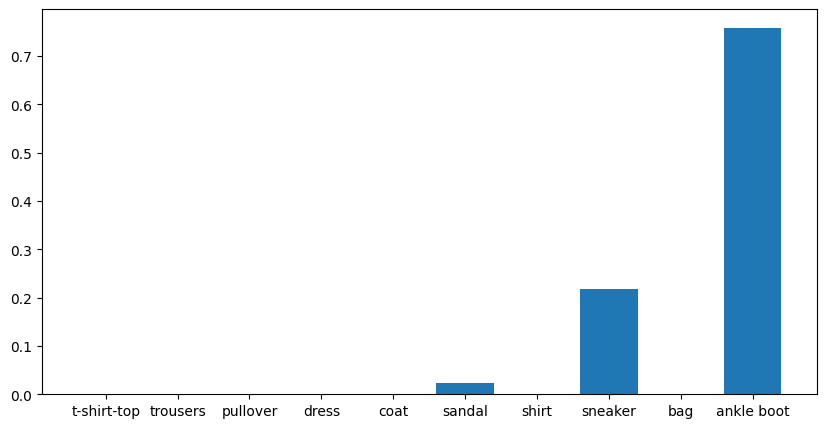

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(class_names, probability[0])